In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 


import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

(10.940044070023767, [<Row index=11>
    name   nickname col2 decliner REPROC      RA          DEC        Host RA      Host DEC    zSN   dzSN zHost dzHost Host Morphology Host SED Type PIaz    dPIaz    PIaHost   dPIaHost  galsnidShift zSNold dzSNold   zSN Source      zHost Source  
    str9    str12   str1   str1    str1     str12        str13        str12        str13      str5  str6  str8  str7        str7           str7     str4    str11      str4     str11        str5      str6    str6      str23            str47      
  -------- -------- ---- -------- ------ ------------ ------------ ------------ ------------ ----- ----- ----- ------ --------------- ------------- ---- ----------- ------- ----------- ------------ ------ ------- -------------- -----------------
  GND13Sto    Stone    A        0      y 12:37:16.778 +62:16:41.43 12:37:16.823 +62:16:42.65 1.833 0.102   1.8    1.2               u             A 1.00 +0.00 -0.00    1.00 +0.00 -0.00         0.00   1.86    0.05 host+SN phot

In [3]:
GND13Sto = candels[-2]

nearby = GND13Sto[1][1]
host = GND13Sto[1][2]

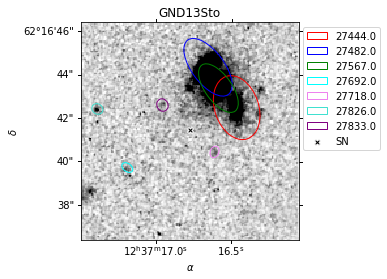

In [7]:
nick = GND13Sto[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GND13Sto[1][0]['RA'],GND13Sto[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.012,val_max = .03 )

In [8]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.physpar[nearby.zspec,nearby.zphot]])

id,z,z_spec,z_peak
str8,str8,str12,str12
27444,1.0700,-1.0000,1.0670
27482,0.5600,0.5572,0.5562
27567,0.5600,0.5573,2.0951
27692,1.2600,-1.0000,1.2587
27718,1.2500,-1.0000,1.2490
27826,0.9300,-1.0000,0.9251
27833,1.6800,-1.0000,1.6766
